# Total cross section for $q\bar{q} \to t \bar{t}$ and  $gg \to t \bar{t}$


In [174]:
import sympy as sy
import heppackv0 as h

In [175]:
#help(h)

In [176]:
t,s,u, = sy.symbols("t s u",real=True)
M, alfs, beta,E = sy.symbols("M alpha_s beta E",positive=True)
cth, theta = sy.symbols("cos_theta theta",real=True)

'tm: '

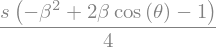

'tm1: '

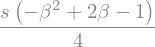

'tm2: '

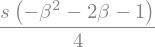

In [177]:
# Calculate mandelstam tm for qq->tt and gg->tt 
p1 = sy.Matrix([E,0,0,E])
p3 = sy.Matrix([E,beta*E*sy.sin(theta),0,beta*E*sy.cos(theta),])
# tm is t with top mass
tm = h.dotprod4(p1-p3,p1-p3).subs(E**2,s/4)

# integration limits for tm
tm1 = tm.subs(theta,0)
tm2 = tm.subs(theta,sy.pi)

display("tm: ",tm)
display("tm1: ",tm1)
display("tm2: ",tm2)

'um: '

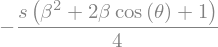

'um1: '

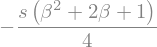

'um2: '

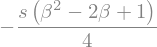

'rm'

In [178]:
# calculate mandelstam um for qq->tt and gg->tt
p2 = sy.Matrix([E,0,0,-E])
p3 = sy.Matrix([E,beta*E*sy.sin(theta),0,beta*E*sy.cos(theta),])
um = h.dotprod4(p2-p3,p2-p3).subs(E**2,s/4)
# calculate limits for integration
um1 = um.subs(theta,0)
um2 = um.subs(theta,sy.pi)

display("um: ",um)
display("um1: ",um1)
display("um2: ",um2)

# check sum of mandelstam
rm = s+tm+um
sy.simplify(rm)
display("rm",rm.subs(beta,sy.sqrt(1-4*M**2/s)).expand())
# result rm should be 2*M**2

# Calculate $qq \to tt$

The result in eq. 8.43 is calculated with 3 different methods

1. integrate eq. 4.32

2. integrate eq. 3.73 and replace alpha with (2/9) alpha_s

3.  integrate  eq. 50.20 on page 682 of PDG 2020,


'dst'

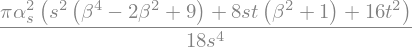

'sig1'

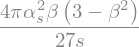

In [182]:
# Methode 1
# use diff. xsec (eq. 4.32 on page 271) of the book
# compare with formula on p. 551
fac1 = (4*sy.pi*alfs**2)/(9*s**2) 
fac2 = (2*(t-M**2)**2 + s**2 +2*t*s)/s**2
fac3 = fac2.subs(M**2,s*(1-beta**2)/4)
dst = (fac1 * fac3).expand()
dst = sy.simplify(dst)
display("dst",dst)
#
sig1 = sy.integrate(dst,(t,tm1,tm2))
sig1 = -sig1.expand()
sig1 = sy.simplify(sig1)
display("sig1",sig1)
# OK, correct result

'dsom'

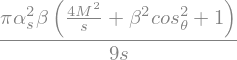

'sig2'

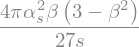

In [183]:
# Methode 2
# use eq. 3.73 on p. 222
# replace alpha with (2/9) * alpha_s
# integrate over cos(theta) 
E2 = s/4
f1 = sy.Rational(2,9)*alfs**2*beta/16/E2
f2 = 1+M**2/E2+beta**2*cth**2
dsom = 2*sy.pi*f1*f2
display("dsom",dsom)
sig2 =sy.integrate(dsom,(cth,-1,1)).expand().subs(M**2,s*(1-beta**2)/4)
sig2 = sy.simplify(sig2)
display("sig2",sig2)
# Resuklt OK

'dsom3'

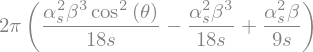

'sig3'

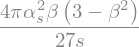

In [184]:
# Methode 3
# use PDG2020, eq. 50.20 on page 682 
f1 = alfs**2/9/s**3 * beta
f2 = ( (M**2-tm)**2 + (M**2-um)**2 + 2*M**2*s)
dsom3 = 2*sy.pi * (f1*f2).subs(M**2,s*(1-beta**2)/4).expand()
display("dsom3",dsom3)
sig3 =sy.integrate(dsom3*sy.sin(theta),(theta,0,sy.pi))
sig3 = sy.simplify(sig3)
display("sig3",sig3)
# Result OK

# Calculate $gg\to tt$

We use eq. 50.21 on 683 in PDG 2020 and replace tm and um using the expressions calculated above. The result for $d\sigma/d\Omega$ is very complicated. 

In the next step we integrate the diff. xsec over $\cos(\theta)$ to get $\sigma_{tot}$. The result contains several log-terms. We show numerically but also by calculationg the real part that the log-terms can be written in a compact form like

$$\log\left(\frac{1+\beta}{1-\beta}\right)$$

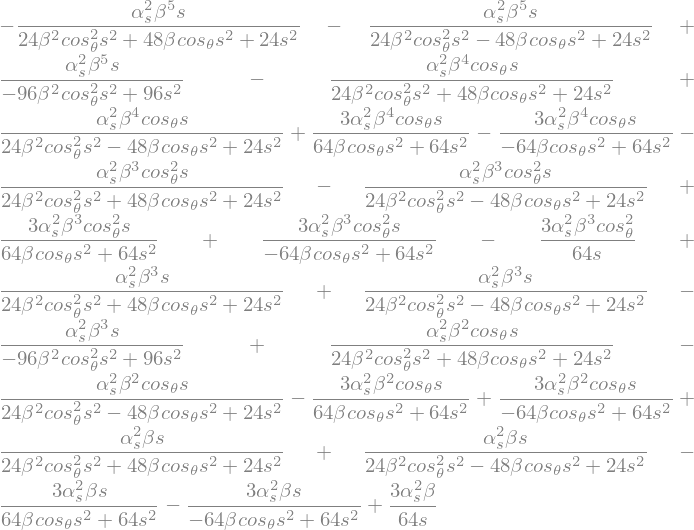

In [186]:
# use eq. 50.21 in PDG2020 on page 683
beta = sy.symbols("beta",positive=True)
tm = -(s/4)*(1+beta**2-2*beta*cth)
um = -(s/4)*(1+beta**2+2*beta*cth)
f0 = alfs**2*beta/32/s
f1 = (6/s**2)*(M**2-tm)*(M**2-um)
f2 = M**2*(s-4*M**2) / 3 / ((M**2-tm)*(M**2-um))
f3 = sy.Rational(4,3) * ( (M**2-tm)*(M**2-um)-2*M**2*(M**2+tm) )
f3 = f3/(M**2-tm)**2
f4 = sy.Rational(4,3) * ( (M**2-tm)*(M**2-um)-2*M**2*(M**2+um) )
f4 = f4/(M**2-um)**2
f5 = 3 * ( (M**2-tm)*(M**2-um)+M**2*(um-tm) )
f5 = f5/s/(M**2-tm)
f6 = 3 * ( (M**2-tm)*(M**2-um)+M**2*(tm-um) )
f6 = f6/s/(M**2-um)
dsom4 = f0 * (f1 - f2 +f3 + f4 -f5 -f6)
dsom4 = dsom4.subs(M**2,s*(1-beta**2)/4).expand()
dsom4

'sig4'

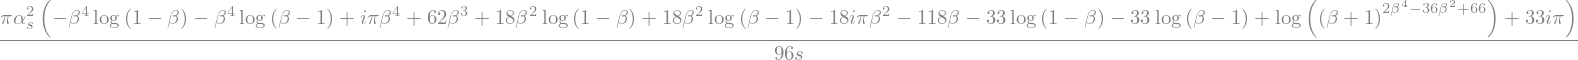

'resig4'

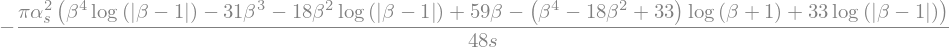

'Looking at the result one realizes that the log-Terms can be combined as given in eq. 8.44 of the book'

In [192]:
# integrate dsom4 over cos(theta)
sig4 =sy.integrate(2*sy.pi*dsom4,(cth,-1,1))
sig4 = sig4.expand()
sig4 = sy.simplify(sig4)
display("sig4",sig4)
resig4 = sy.simplify(sy.re(sig4))
display("re(sig4)",resig4)
display("Looking at the result one realizes that the log-Terms can be combined as given in eq. 8.44 of the book")

'sigbook'

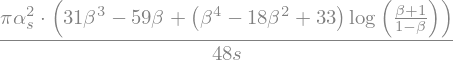

In [193]:
# numerical comparison with eq. 8.44 in the book
g0 = sy.pi*alfs**2/s/48
g1 = (33-18*beta**2+beta**4)*sy.log((1+beta)/(1-beta)) - 59*beta + 31*beta**3
sigbook = g0*g1
display("sigbook",sigbook)

In [206]:
# some numerical checks
# result for integration
dsubs = {s:997**2, beta: 0.57, alfs:0.11}
display("sig4",sy.N(sig4.subs(dsubs)))
display("re(sig4)",sy.N(sy.re(sig4.subs(dsubs))))
display("im(sig4)",sy.N(sy.im(sig4.subs(dsubs))))
display("sigbook",sy.N(sigbook.subs(dsubs)))

'sig4'

're(sig4)'

'im(sig4)'

'sigbook'